## HISE scRNA-seq API demo

Lucas T. Graybuck, PhD (lucasg@alleninstitute.org)

Updated 2021-03-18 by Valerie Conklin (valerie.conklin@alleninstitute.org)

In this notebook, we'll demonstrate retrieval of scRNA-seq data from HISE using the R API package called (you guessed it) `hise`.

The HISE package lets you download files containing the scRNA-seq results from a single PBMC sample (i.e. PBMCs from one patient obtained from a single visit). 


### Load packages

`hise` is the only package we'll really need to start pulling data from HISE. However, for this demo we'll also load `Seurat` and `SingleCellExperiment`, which can also be used with HISE query results.

Because these packages dump a lot of messages on load, we'll build the `quiet_library()` function just for the sake of cleaner display in this notebook.

In [1]:
quiet_library <- function(...) {
    suppressPackageStartupMessages(library(...))
}

quiet_library(hise)
quiet_library(Seurat)
quiet_library(SingleCellExperiment)
options(stringsAsFactors = FALSE) # Not necessary if your R version is >= 4.0

### Retrieving files

The `hise::readFiles` method is used to pull files from HISE into the IDE. It takes a list of file IDs as an argument. A `fileId` is a UUID that looks like this: `29e18e00-67d2-495d-9378-75142720ed2a`. 
The best way to find a list of file IDs for files you want to download is to use the Advanced Search page on the HISE website to narrow down the files you want, and then click the "View IDE Script" button at the bottom of the search results page. This will show the readFiles function with the file IDs automatically populated for the files you selected in the search results. 
`hise::readFiles` will download each file to your IDE, as well as return a data frame (or list of data frames) representing the contents of these files. 
For this demo, we'll use a small test file with this `fileId`:
```
be011613-e653-4c26-ab00-02953732d2ab
```

In [3]:
myFile <- "be011613-e653-4c26-ab00-02953732d2ab"

Copying the `readFiles` function from the "View IDE Script" button on the Advanced Search results page is the easiest way to get files of any type into the IDE. This function accepts file IDs of any file type, not just scRNA files. 

However, there are also 4 SCRNA-specific functions to know about that may be useful:  
1. `readSCRNAFileSeurat()` converts HISE query results directly to a `Seurat` object, ready for downstream analysis with the Seurat package.  
2. `readSCRNAFileSCE()` provides query results as a `SingleCellExperiment`, ready for use with a myriad of `BioConductor` packages.  
3. `readSCRNAFileCDS()` converts query results to `cell_data_set`, ready for use with `monocle3`.  
4. `readSCRNAFile()` is the parent of the two functions above, and allows more narrowly filtered retrieval of `data.frame` and `Matrix::dgCMatrix` objects.  

Let's take a look at the use of these 4 retrieval modes:

#### Seurat Results

In [4]:
fileSeurat <- readSCRNAFileSeurat(fileId = myFile)
fileSeurat

An object of class Seurat 
33538 features across 42 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)

Here, we have a `Seurat` object, so we can do all of our favorite `Seurat`y things:

In [5]:
fileSeurat <- Seurat::NormalizeData(fileSeurat)
fileSeurat <- Seurat::FindVariableFeatures(fileSeurat)
fileSeurat <- Seurat::ScaleData(fileSeurat)
fileSeurat <- Seurat::RunPCA(fileSeurat, 
                             npcs = 5,
                             ndims.print = 1)

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -1.6441”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.32186”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  2.8147e-30”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.090619”Centering and scaling data matrix
PC_ 1 
Positive:  ENSG00000081059, ENSG00000120915, ENSG00000111863, ENSG00000168685, ENSG00000145293, ENSG00000080986, ENSG00000251562, ENSG00000138795, ENSG00000231621, ENSG00000080845 
	   ENSG00000110697, ENSG00000163785, ENSG00000116191, ENSG00000147535, ENSG00000135205, ENSG00000170445, ENSG00000277734, ENSG00000265972, ENSG00000101266, ENSG00000172005 
	   ENSG00000156639, ENSG00000211677, ENSG00000205268, ENSG00000157450, ENSG00000160307, 

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”16:28:05 UMAP embedding parameters a = 0.9922 b = 1.112
16:28:05 Read 42 rows and found 5 numeric columns
16:28:05 Using Annoy for neighbor search, n_neighbors = 30
16:28:05 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
16:28:06 Writing NN index file to temp file /tmp/RtmpG5dnUk/file582d745a30f0
16:28:06 Searching Annoy index using 1 thread, search_k = 3000
16:28:06 Annoy recall = 100%
16:28:06 Commencing smooth kNN distance calibration using 1 thread
16:28:07 Initializing from normalized Laplacian + noise
16:28:07 Commencing optimization f

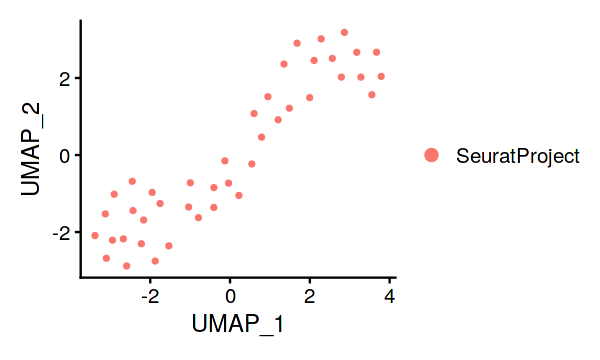

In [6]:
options(repr.plot.width = 5, repr.plot.height = 3)

fileSeurat <- Seurat::RunUMAP(fileSeurat, dims = 1:5)
Seurat::DimPlot(fileSeurat, reduction = "umap")

#### SingleCellExperiment Results

In [7]:
fileSCE <- readSCRNAFileSCE(fileId = myFile)
fileSCE

class: SingleCellExperiment 
dim: 33538 42 
metadata(0):
assays(1): counts
rownames(33538): ENSG00000243485 ENSG00000237613 ... ENSG00000277475
  ENSG00000268674
rowData names(4): id name type i
colnames(42): 2e9c3e1ca61b11ea80be4640a96b0d6e
  2e9c5ca8a61b11ea80be4640a96b0d6e ... f7557d1aa61a11ea845b6abc0c1f7f04
  f7558184a61a11ea845b6abc0c1f7f04
colData names(18): batch_id cell_name ... umap_2 well_id
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

Here, we've got a `SingleCellExperiment` that we can use for BioConductor analyses

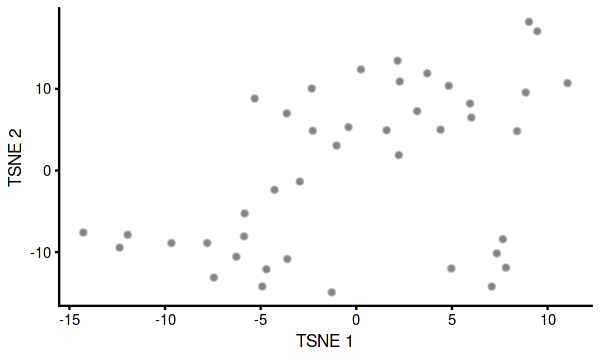

In [8]:
options(repr.plot.width = 5, repr.plot.height = 3)

fileSCE <- scater::logNormCounts(fileSCE)
fileSCE <- scater::runPCA(fileSCE, ncomponents = 5)
fileSCE <- scater::runTSNE(fileSCE, dimred="PCA")
scater::plotReducedDim(fileSCE, dimred="TSNE")

### cell_data_set Objects

In [9]:
fileCDS <- readSCRNAFileCDS(fileId = myFile)
fileCDS

Loading required namespace: monocle3

Attaching package: ‘monocle3’

The following objects are masked from ‘package:Biobase’:

    exprs, fData, fData<-, pData, pData<-



class: cell_data_set 
dim: 33538 42 
metadata(1): cds_version
assays(1): counts
rownames(33538): ENSG00000243485 ENSG00000237613 ... ENSG00000277475
  ENSG00000268674
rowData names(4): id gene_short_name type i
colnames(42): 2e9c3e1ca61b11ea80be4640a96b0d6e
  2e9c5ca8a61b11ea80be4640a96b0d6e ... f7557d1aa61a11ea845b6abc0c1f7f04
  f7558184a61a11ea845b6abc0c1f7f04
colData names(19): batch_id cell_name ... well_id Size_Factor
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

### Custom results

For other packages and analyses, you can retrieve results from HISE as `data.frame` and `Matrix::dgCMatrix` objects with `readSCRNAFile()`.

Different parts of the dataset are retrieved based on the `format` parameter:
1. `values` retrieves a `Matrix::dgCMatrix`, which is a column-indexed sparse matrix representation of scRNA-seq count values. Cells are columns, and genes are rows in this representation.
2. `observations` retrieves metadata related to cells as a `data.frame`. The `cell_uuid` column of the resulting data.frame correspond to the column names of the `values` matrix.
3. `features` retrieves metadata related to genes as a `data.frame`. The `id` column of this data.frame correspond to the row names of `values` matrix.

**Note:** `features` retrieved from the server currently return only those features that have values in the specified file. To retrieve all 10x 3' features, we provide a second function, `getSCRNAFeatures()`, that will supply all available features.

In [10]:
fileValues <- readSCRNAFile(fileId = myFile,
                           format = "values")
str(fileValues)

Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  ..@ i       : int [1:74481] 14 15 18 20 24 46 63 70 72 115 ...
  ..@ p       : int [1:43] 0 1313 2272 3335 6560 8406 9867 13827 14901 15994 ...
  ..@ Dim     : int [1:2] 10867 42
  ..@ Dimnames:List of 2
  .. ..$ : chr [1:10867] "ENSG00000000003" "ENSG00000000419" "ENSG00000000457" "ENSG00000000460" ...
  .. ..$ : chr [1:42] "2e9c3e1ca61b11ea80be4640a96b0d6e" "2e9c5ca8a61b11ea80be4640a96b0d6e" "2e9cbd06a61b11ea80be4640a96b0d6e" "2e9cd99ea61b11ea80be4640a96b0d6e" ...
  ..@ x       : num [1:74481] 1 1 1 1 1 1 1 1 1 1 ...
  ..@ factors : list()


In [11]:
fileObs <- readSCRNAFile(fileId = myFile,
                         format = "observations")
str(fileObs)

'data.frame':	42 obs. of  18 variables:
 $ batch_id              : chr  "X002" "X002" "X002" "X002" ...
 $ cell_name             : chr  "idealistic_threadbare_hamadryad" "babyish_seaborne_xenopus" "isinglass_crusty_clam" "hick_betrothed_chipmunk" ...
 $ cell_uuid             : chr  "2e9c3e1ca61b11ea80be4640a96b0d6e" "2e9c5ca8a61b11ea80be4640a96b0d6e" "2e9cbd06a61b11ea80be4640a96b0d6e" "2e9cd99ea61b11ea80be4640a96b0d6e" ...
 $ chip_id               : chr  "X002-P1C1" "X002-P1C1" "X002-P1C1" "X002-P1C1" ...
 $ hto_barcode           : chr  "TTCCGCCTCTCTTTG" "TTCCGCCTCTCTTTG" "TTCCGCCTCTCTTTG" "TTCCGCCTCTCTTTG" ...
 $ hto_category          : chr  "singlet" "singlet" "singlet" "singlet" ...
 $ n_genes               : int  1313 959 1063 3225 1846 1461 3960 1074 1093 3281 ...
 $ n_mito_umis           : int  62 79 93 430 131 77 754 186 59 397 ...
 $ n_reads               : int  17010 8579 13808 42169 21648 20103 61166 14925 12331 53016 ...
 $ n_umis                : int  4575 2334 3967 12146 6

In [12]:
fileFeat <- readSCRNAFile(fileId = myFile,
                          format = "features")
str(fileFeat)

'data.frame':	10867 obs. of  4 variables:
 $ feature_type: chr  "Gene Expression" "Gene Expression" "Gene Expression" "Gene Expression" ...
 $ genome      : chr  "GRCh38" "GRCh38" "GRCh38" "GRCh38" ...
 $ id          : chr  "ENSG00000000003" "ENSG00000000419" "ENSG00000000457" "ENSG00000000460" ...
 $ name        : chr  "TSPAN6" "DPM1" "SCYL3" "C1orf112" ...


In [13]:
featAll <- getSCRNAFeatures()

str(featAll)

'data.frame':	33538 obs. of  4 variables:
 $ id  : chr  "ENSG00000243485" "ENSG00000237613" "ENSG00000186092" "ENSG00000238009" ...
 $ name: chr  "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...
 $ type: chr  "Gene Expression" "Gene Expression" "Gene Expression" "Gene Expression" ...
 $ i   : int  0 1 2 3 4 5 6 7 8 9 ...


### Retrieving results

We can get data for a combined set of files that we've defined as a "Result set" in HISE using similar patterns. For this demo, I've made a Result set consisting of 3 small files:
```
7448cb78-980e-4a15-ac6f-5499536ef48b
```

In [14]:
myResult <- "7448cb78-980e-4a15-ac6f-5499536ef48b"

For `resultId`s, we have the same 4 read functions with `Result` instead of `File` in their names:  
1. `readSCRNAResultSeurat()` converts HISE query results directly to a `Seurat` object, ready for downstream analysis with the Seurat package.  
2. `readSCRNAResultSCE()` provides query results as a `SingleCellExperiment`, ready for use with a myriad of `BioConductor` packages.   
3. `readSCRNAResultCDS()` returns results as a `cell_data_set` for use with `monocle3`.   
4. `readSCRNAResult()` is the parent of the two functions above, and allows more flexible retrieval of `data.frame` and `Matrix::dgCMatrix` objects.  

By default, the results from all of the files in the Result set are combined into a single resulting object.

In [15]:
resultSeurat <- readSCRNAResultSeurat(resultId = myResult)
resultSeurat

An object of class Seurat 
33538 features across 84 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)

If you'd like a list of separate data for each file in your `Result` set, this can be obtained using `combine = FALSE`:

In [16]:
resultSeuratSeparate <- readSCRNAResultSeurat(resultId = myResult,
                                              combine = FALSE)
lapply(resultSeuratSeparate, print)

An object of class Seurat 
33538 features across 42 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)
An object of class Seurat 
33538 features across 42 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)


[[1]]
An object of class Seurat 
33538 features across 42 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)

[[2]]
An object of class Seurat 
33538 features across 42 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)


The other `Result`-centric functions work similarly to the `File`-centric functions demonstrated above.

### Session Info

In [17]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Debian GNU/Linux 9 (stretch)

Matrix products: default
BLAS:   /usr/lib/openblas-base/libblas.so.3
LAPACK: /usr/lib/libopenblasp-r0.2.19.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] monocle3_0.2.2              SingleCellExperiment_1.8.0 
 [3] SummarizedExperiment_1.16.1 DelayedArray_0.12.3        
 [5] BiocParallel_1.20.1         matrixStats_0.56.0         
 [7] Biobase_2.46.0              GenomicRanges_1.38.0       
 [9] GenomeInfoDb_1.2